In [77]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

# 1. Business understanding



# 2. Data understanding
The dataset include data for the estimation of besity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. It contains 17 attributes and 2111 instances.
The dataset is obtained from: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

The attributes:

- `Gender`
- `Age`
- `Height`
- `Weight`
- `family_history_with_overweight` Has a family member suffered or suffers from overweight?
- `FAVC` Do you eat high caloric food frequently?
- `FCVC` Do you usually eat vegetables in your meals?
- `NCP` How many main meals do you have daily?
- `CAEC` Do you eat any food between meals?
- `SMOKE` Do you smoke?
- `CH2O` How much water do you drink daily?
- `SCC` Do you monitor the calories you eat daily?
- `FAF` How often do you have physical activity?
- `TUE` How much time do you use technological devices such as cell phone, videogames, television, computer and others?
- `CALC` How often do you drink alcohol?
- `MTRANS` Which transportation do you usually use?
- `NObeyesdad` Obesity level

# 3. Data preparation


In [78]:
df = pd.read_csv('datasets/ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [79]:
df['Gender'] = df['Gender'].replace({'Female': '0', 'Male': '1'})
df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'no': '0', 'yes': '1'})
df['FAVC'] = df['FAVC'].replace({'no': '0', 'yes': '1'})
df['SMOKE'] = df['SMOKE'].replace({'no': '0', 'yes': '1'})
df['SCC'] = df['SCC'].replace({'no': '0', 'yes': '1'})
df['CALC'] = df['CALC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['MTRANS'] = df['MTRANS'].replace({'Walking': '0', 'Bike': '1', 'Motorbike': '2', 'Public_Transportation': '3', 'Automobile': '4'})
df['CAEC'] = df['CAEC'].replace({'no': '0', 'Sometimes': '1', 'Frequently': '2', 'Always': '3'})
df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight': '0', 'Normal_Weight': '1', 'Overweight_Level_I': '2', 'Overweight_Level_II': '3', 'Obesity_Type_I': '4', 'Obesity_Type_II': '5', 'Obesity_Type_III': '6'})

df['Gender'] = df['Gender'].astype(int)
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype(int)
df['FAVC'] = df['FAVC'].astype(int)
df['SMOKE'] = df['SMOKE'].astype(int)
df['SCC'] = df['SCC'].astype(int)
df['CALC'] = df['CALC'].astype(int)
df['MTRANS'] = df['MTRANS'].astype(int)
df['CAEC'] = df['CAEC'].astype(int)
df['NObeyesdad'] = df['NObeyesdad'].astype(int)
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.140692,0.020843,2.008011,0.045476,1.010298,0.657866,0.731407,3.125059,3.112269
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,0.676969,1.985062
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,1.000000,0.000000,1.584812,0.000000,0.124505,0.000000,0.000000,3.000000,1.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.625350,1.000000,3.000000,3.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.477420,0.000000,1.666678,1.000000,1.000000,3.000000,5.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,6.000000


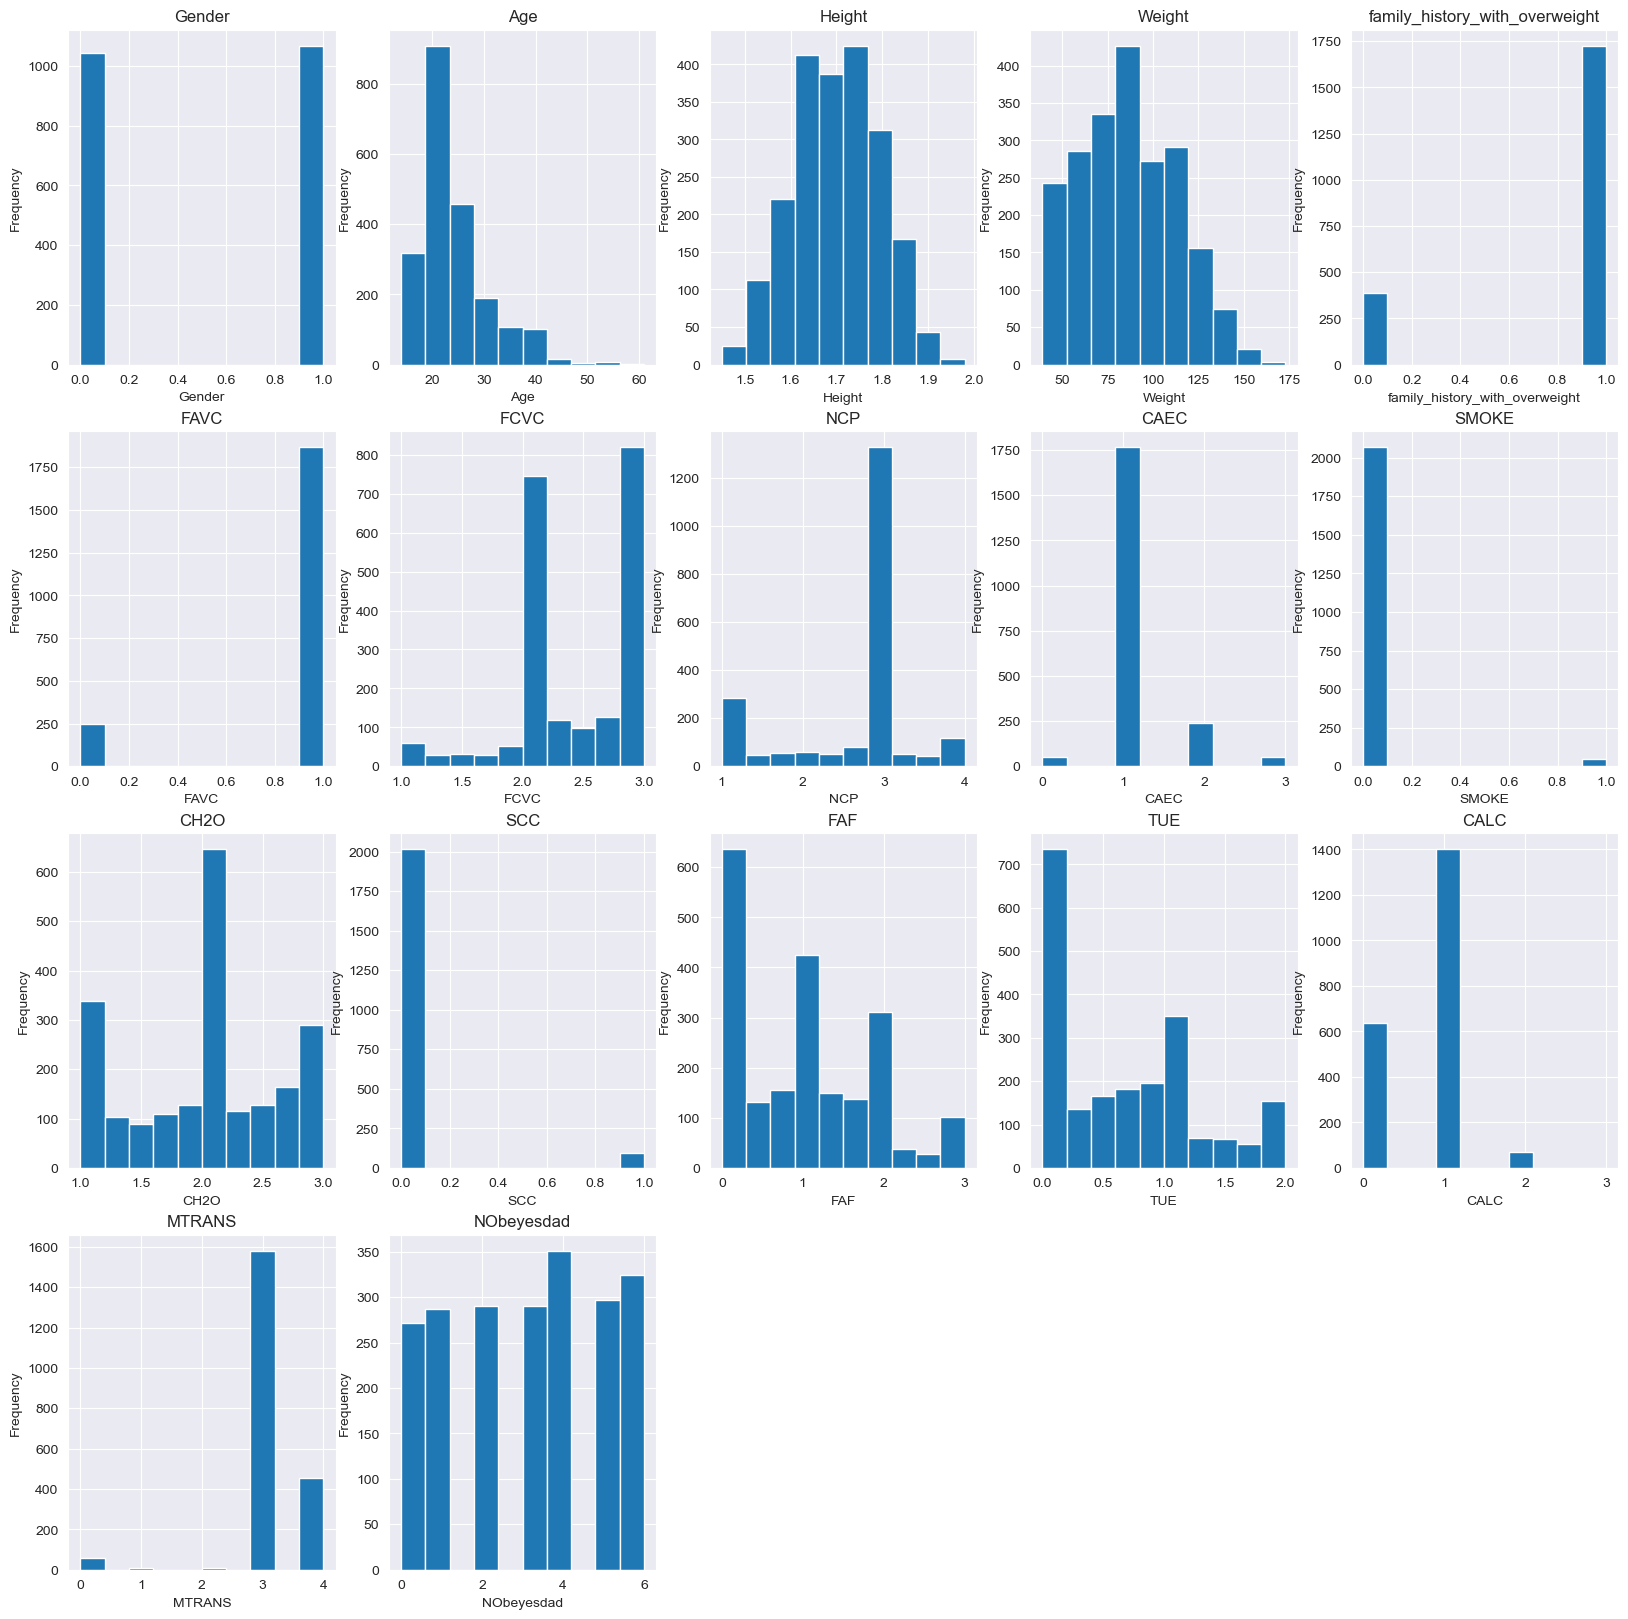

In [80]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 20))
for i, col in enumerate(df.select_dtypes(include=['int', 'float'])):
    plt.subplot(4, 5, i + 1)
    df[col].plot(kind='hist', title=col)
    plt.xlabel(col)

## 4. Modelling
We use decision tree classifier to predict the target variable NOb. Using the decision tree classifier, we predicted the top 5 most important features in determining the overweightness of an individual.

Accuracy: 0.7178030303030303
Recall: 0.7178030303030303


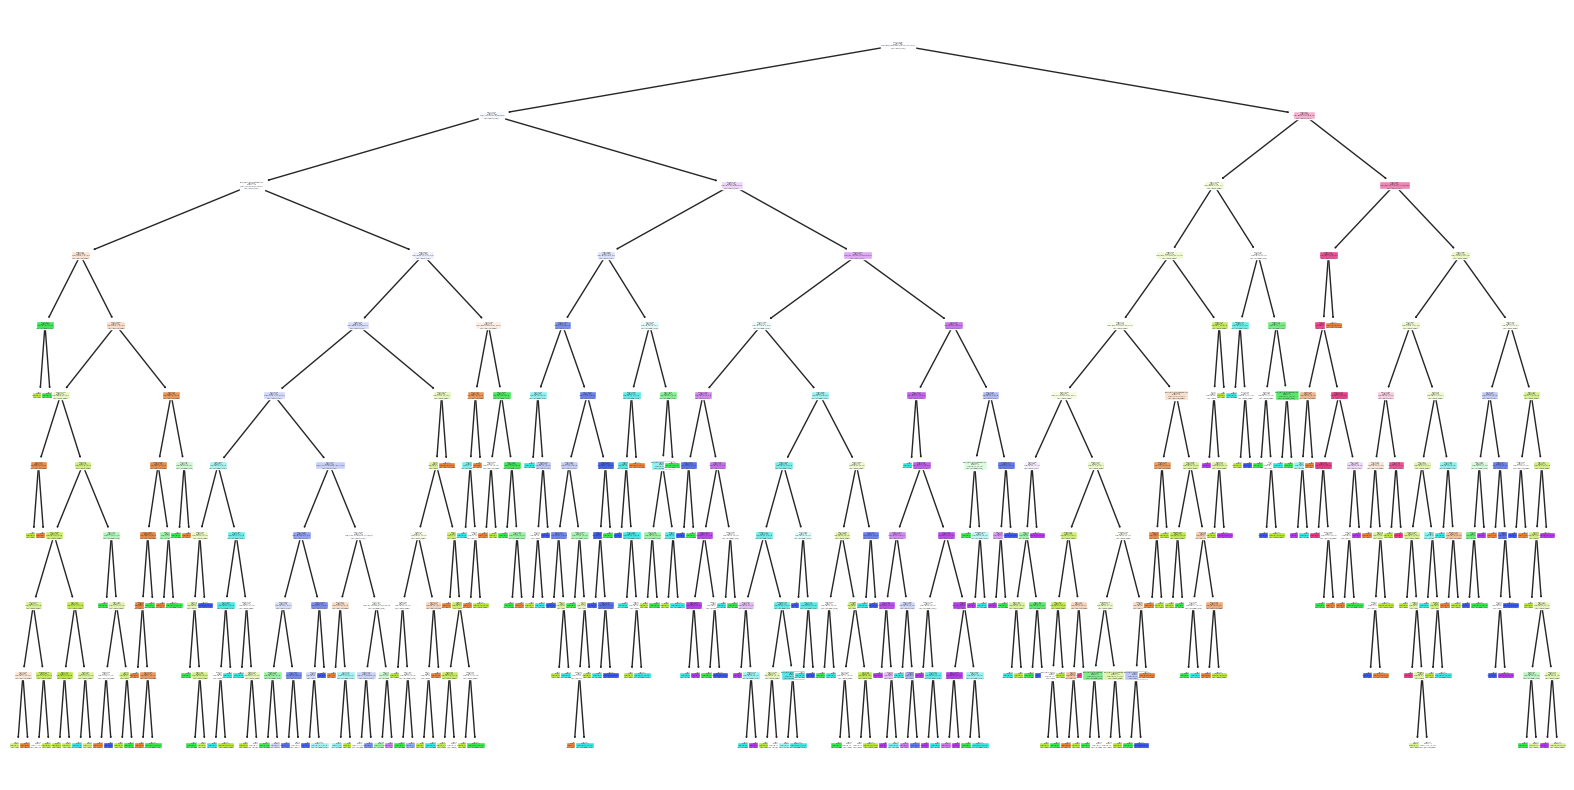

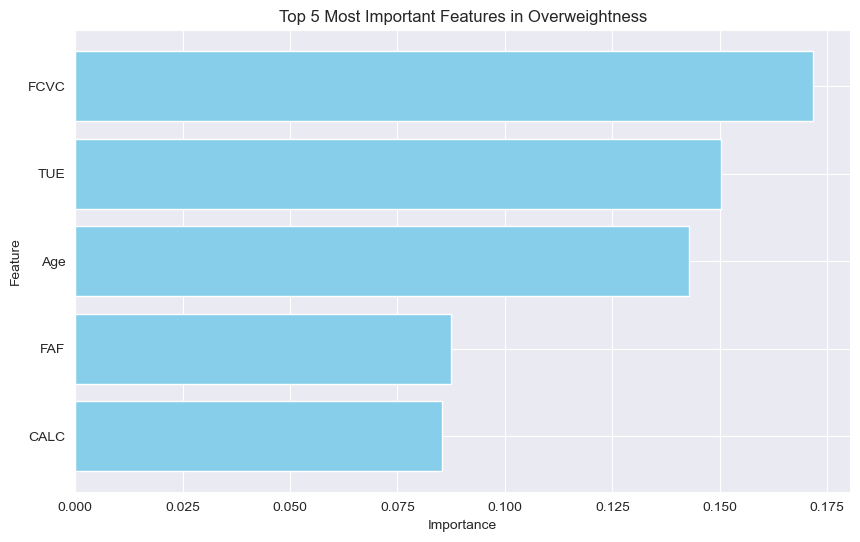

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt

# Define features and target
X = df.drop(['NObeyesdad', 'Weight', 'Height'], axis=1)
y = df['NObeyesdad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'], filled=True)
plt.show()

importances = clf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

top_5_features = feature_importances.sort_values(by='Importance', ascending=False).head(5)

plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features in Overweightness')
plt.gca().invert_yaxis()
plt.show()

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score

df.drop('NObeyesdad', axis=1, inplace=True)

y = df['family_history_with_overweight']
X = df.drop(['family_history_with_overweight', "Weight", "Height", "Age"], axis=1)

X = X.astype(float)

In [83]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
reg = LogisticRegression()
reg.fit(X, y)
y_pred = cross_val_predict(estimator=reg, X=X, y=y, cv=50)

cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

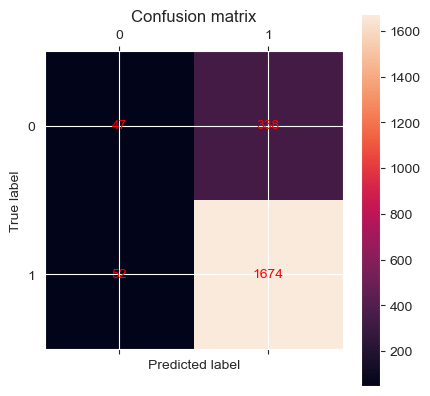

Accuracy: 0.82
Precision: 0.83
Recall: 0.97


In [84]:
# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("Accuracy: %0.2f" % accuracy)
print("Precision: %0.2f" % precision)
print("Recall: %0.2f" % recall)

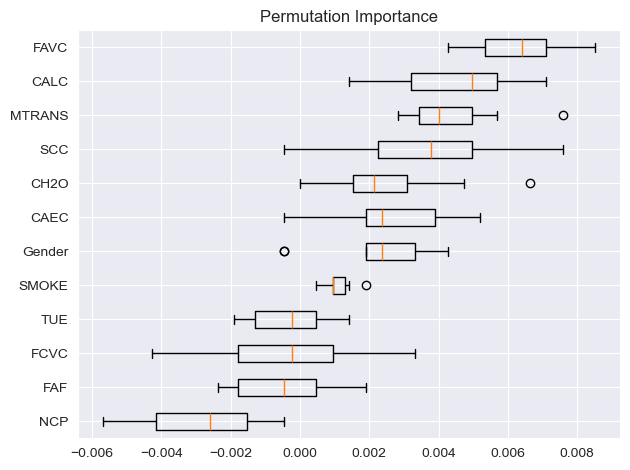

In [85]:
# feature importance
from sklearn.inspection import permutation_importance

result = permutation_importance(reg, X, y, n_repeats=10, scoring="accuracy", random_state=0, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T, vert=False, tick_labels=X.columns[sorted_idx])
ax.set_title("Permutation Importance")
fig.tight_layout()
plt.show()

In [86]:
features = ['Gender', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']
questions = ['Gender', 'Do you eat high caloric food frequently?', 'Do you usually eat vegetables in your meals?', 'How many main meals do you have daily?', 'Do you eat any food between meals?', 'Do you smoke?', 'How much water do you drink daily?', 'Do you monitor the calories you eat daily?', 'How often do you have physical activity?', 'How much time do you use technological devices such as cell phone, videogames, television, computer and others?', 'How often do you drink alcohol?', 'Which transportation do you usually use?']

Xi = pd.DataFrame(columns=features)

# read input data
for f in features:
    val = input(f"Enter value for feature: {questions[features.index(f)]} ")
    Xi[f] = [float(val)]

# get probability estimate
Xi = pd.DataFrame(scaler.transform(Xi), columns=Xi.columns)
p = reg.predict_proba(Xi)[:,1]

# output
print("Probability of family member that suffers/has suffered from overweight: %0.2f" % p[0])

KeyboardInterrupt: Interrupted by user